In [1]:
from dataset.hico import build
import argparse
from PIL import Image, ImageDraw, ImageFont
from IPython.display import clear_output

/opt/conda/envs/ofa/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
parser = argparse.ArgumentParser(description="hico")
parser.add_argument('--num_queries', default=100, type=int, help="Number of query slots")
parser.add_argument("--data_path", default="/data/dataset/HICO-DET/", type=str)
args = parser.parse_args([])

In [3]:
dataset_train = build("train", args)
dataset_val = build("val", args)
actions = dataset_train.get_actions()
COCO_CLASSES = dataset_train.COCO_CLASSES
len(dataset_train), len(dataset_val)

(37633, 9546)

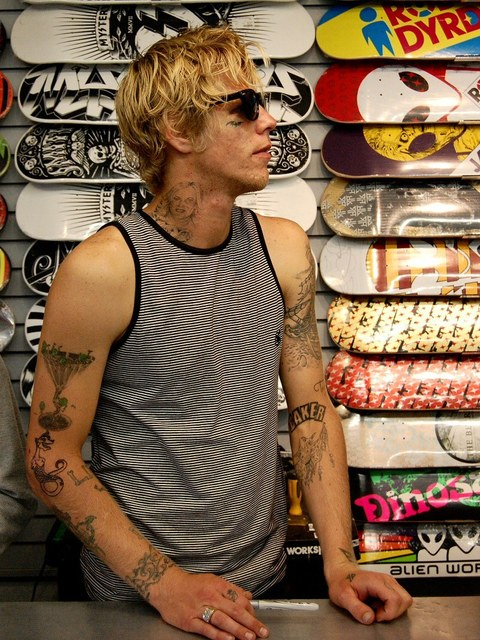

person no interaction skateboard


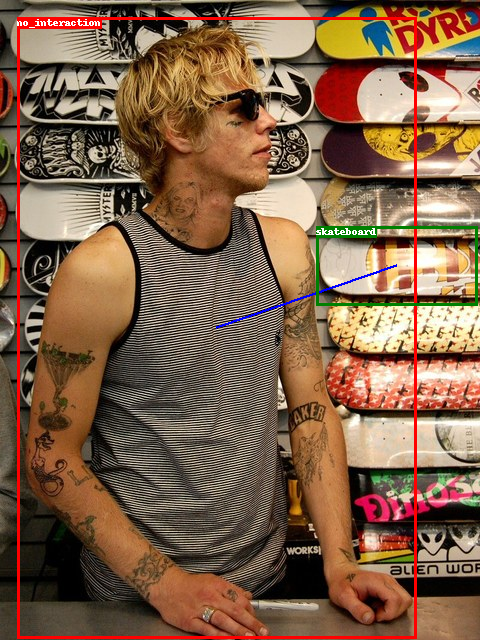

In [4]:
# font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf", size=20)
for i, (img, anno) in enumerate(dataset_train):
  display(img)
  draw = ImageDraw.Draw(img)
  # print(anno.keys())
  hois = anno["hois"]
  boxes = anno["boxes"]
  labels = anno["labels"]
  last_id = -1
  for (hum_id, obj_id, hoi_id) in hois:
    if hum_id != last_id:
      hoi_names = []
    last_id = hum_id
    hum_bb = boxes[hum_id]
    hum_label = labels[hum_id]
    hum_name = COCO_CLASSES[hum_label]
    
    obj_bb = boxes[obj_id]
    obj_label = labels[obj_id]
    obj_name = COCO_CLASSES[obj_label]
    
    hoi_name = actions[hoi_id]
    hoi_names.append(hoi_name)
    
    draw.line(((hum_bb[0]+hum_bb[2])//2, (hum_bb[1]+hum_bb[3])//2, (obj_bb[0]+obj_bb[2])//2, (obj_bb[1]+obj_bb[3])//2), fill="blue", width=3)
    
    draw.rectangle((hum_bb[0], hum_bb[1], hum_bb[2], hum_bb[3]), outline="red", width=3)
    text_area = draw.textbbox((hum_bb[0], hum_bb[1]), ", ".join(hoi_names), anchor="lb")
    draw.rectangle(text_area, fill="red")
    draw.text((hum_bb[0], hum_bb[1]), ", ".join(hoi_names), fill='white', anchor="lb")
    
    draw.rectangle((obj_bb[0], obj_bb[1], obj_bb[2], obj_bb[3]), outline="green", width=3)
    text_area = draw.textbbox((obj_bb[0], obj_bb[1]), obj_name, anchor="lb")
    draw.rectangle(text_area, fill="green")
    draw.text((obj_bb[0], obj_bb[1]), obj_name, fill='white', anchor="lb")
    
    print(hum_name, hoi_name.replace('_', ' '), obj_name)
    
  display(img)
  
  message = input(str(i))
  if message == 'end':
    break
  clear_output(True)